# Assignment 2 - Machine Learning Basics

## *Lisa Sapozhnikov*
Netid:  *ls258*

## Learning Objectives:
1. Be able to apply basic regression and classification supervised learning techniques to data and evaluate the performance of those methods
2. Understand the bias-variance tradeoff and how adjusting model flexibility impacts model selection and the training process

# Conceptual Questions

## 1
**[5 points]**
For each part (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

**(a)** The sample size $n$ is extremely large, and the number of predictors $p$ is small.

**(b)** The number of predictors $p$ is extremely large, and the number of observations $n$ is small.

**(c)** The relationship between the predictors and response is highly non-linear.

**(d)** The variance of the error terms, i.e. $\sigma^2 = Var(\epsilon)$, is extremely high

**ANSWER**

**(a)** When there is a large sample size but only a few predictors a flexible statistical learning method would generally perform better than an inflexible method. A flexible method would better tailor to the data, and since the sample is large would not be likely to overfit, keeping variance low. It would also reduce bias by using a more complex model, especially since a lower number of predictors signals a potentially less complex problem.

**(b)** When there are many predictors but a small sample size, a flexible statistical learning method would generally perform worse than an inflexible method. When the sample size is small, tailoring to the data would most likely lead to overfit, yielding high variance when testing on other data sets.

**(c)** When the relationship between the predictors and response is highly non-linear, a flexible statistical learning method would generally perform better than an inflexible method. A flexible model would better tailor to the data's non-linear nature as opposed to a more inflexible, linear model. 

**(d)** When the variance of the error terms i.e. $\sigma^2 = Var(\epsilon)$ is extremely high, a flexible statistical learning method would generally perform worse than an inflexible method. A flexible model would overtailor to the high variance (noise) of the training data and would perform poorly.

## 2
**[5 points]** For each of the following, (i) explain if each scenario is a classification or regression problem, (ii) indicate whether we are most interested in inference or prediction for that problem, and (iii) provide the sample size $n$ and number of predictors $p$ indicated for each scenario.

**(a)** We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary.

**(b)** We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.

**(c)** We are interesting in predicting the % change in the US dollar in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the dollar, the % change in the US market, the % change in the British market, and the % change in the German market.

**ANSWER**

**(a)** This is a regression problem since we are aiming to predict CEO salary, and an inference problem since we want to understand how various factors determine CEO salary, rather than just predicting the number.

$n = 500$, $p =3$

**(b)** This is a classification problem as we only care about classifying the product as a success or a failure, and is a prediction problem as we want to predict whether the product will succeed or fail.

$n = 20$, $p =13$

**(c)** This is a regression problem since we wish to predict the exact % change in the dollar, rather than whether it increased or decreased. This is a prediction problem as we aren't interested in how changes in the value of various markets determine the % change in the dollar, we're only interested in the actual % change value.

$n = 52$, $p =3$

# Practical Questions

## 3
**[20 points] Classification I: Creating a classification algorithm**.

**(a)** Build a working version of a binary kNN classifier using the skeleton code below.

**(b)** Load the datasets to be evaluated here. Each includes training features ($\mathbf{X}$), and test features ($\mathbf{y}$) for both a low dimensional ($p = 2$ features/predictors) and a high dimensional ($p = 100$ features/predictors). For each of these datasets there are $n=100$ observations of each. They can be found in the `data` subfolder in the `assignments` folder on github. Each file is labeled similar to `A1_X_train_low.csv`, which lets you know whether the file contains features, $X$, or targets, $y$; training or testing data; and is from the low or high dimensional dataset.

**(c)** Train your classifier on first the low dimensional dataset and then the high dimensional dataset with $k=5$. Evaluate the classification performance on the corresponding test data for each. Calculate the time it takes to make the predictions in each case and the overall accuracy of each set of test data predictions.

**(d)** Compare your implementation's accuracy and computation time to the scikit learn [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) class. How do the results and speed compare?

**(e)** Some supervised learning algorithms are more computationally intensive during training than testing. What are the drawbacks of the prediction process being slow?

In [58]:
import numpy as np
import operator
from scipy.spatial import distance
# (a) Write your own kNN classifier

class Knn:
# k-Nearest Neighbor class object for classification training and testing
    def __init__(self, x_train, y_train):
        self.fit(x_train, y_train)
        
    def fit(self, x, y):
        # Save the training data to properties of this class
        self.x_train = x
        self.y_train = y
        
        
    def predict(self, x, k):
        y_hat = np.ones(len(self.y_train)) # Variable to store the estimated class label for 
        # Calculate the distance from each vector in x to the training data
        ind = 0
        for i in x:
            index = 0
            distances = []
            for j in self.x_train:
                dist = distance.euclidean(i,j)
                distances.append((self.y_train[index], dist))
                index+=1
            distances.sort(key=operator.itemgetter(1))
            sum = 0
            for n in range(k):
                sum = sum + distances[n][0]
            if sum > k/2:
                y_hat[ind] = 1
            else:
                y_hat[ind] = 0
            ind+=1
                    
        # Return the estimated targets
        return y_hat

# Metric of overall classification accuracy
#  (a more general function, sklearn.metrics.accuracy_score, is also available)
def accuracy(y,y_hat):
    nvalues = len(y)
    accuracy = sum(y == y_hat) / nvalues
    return accuracy

In [59]:
# Evaluate the performance of your kNN classifier on a low- and a high-dimensional dataset 
#   and time the predictions of each

import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import time

def accuracy(y,y_hat):
    nvalues = len(y)
    accuracy = sum(y == y_hat) / nvalues
    return accuracy

# Low Predictors

x_train_low = np.genfromtxt('data/A1_X_train_low.csv', delimiter=',')
y_train_low = np.genfromtxt('data/A1_Y_train_low.csv', delimiter=',')
train_sample_rand = np.random.choice(y_train_low.shape[0], 100, replace=False)
sample_x_train_low = x_train_low[train_sample_rand, :]
sample_y_train_low = y_train_low[train_sample_rand]

x_test_low = np.genfromtxt('data/A1_X_test_low.csv', delimiter=',')
y_test_low = np.genfromtxt('data/A1_Y_test_low.csv', delimiter=',')
test_sample_rand = np.random.choice(y_test_low.shape[0], 100, replace=False)
sample_x_test_low = x_test_low[test_sample_rand, :]
sample_y_test_low = y_test_low[test_sample_rand]

knn = Knn(sample_x_train_low, sample_y_train_low)
start1 = time.time()
y_hat_low = knn.predict(sample_x_test_low, 5)
end1 = time.time()
accuracy_me = accuracy(sample_y_test_low, y_hat_low)
print("My kNN run-time (sec) low predictors: %f" % (end1-start1))
print("My kNN accuracy low predictors: %f" % accuracy_me)

knn_sk = KNeighborsClassifier(n_neighbors=5)
knn_sk.fit(sample_x_train_low, sample_y_train_low)
start2 = time.time()
y_hat_low_sk = knn_sk.predict(sample_x_test_low)
end2 = time.time()
accuracy_sk = accuracy(sample_y_test_low, y_hat_low_sk)
print("SkLearn kNN run-time (sec) low predictors: %f" % (end2-start2))
print("SkLearn kNN accuracy low predictors: %f" % accuracy_sk)

# High Predictors

x_train_high = np.genfromtxt('data/A1_X_train_high.csv', delimiter=',')
y_train_high = np.genfromtxt('data/A1_Y_train_high.csv', delimiter=',')
train_sample_rand = np.random.choice(y_train_high.shape[0], 100, replace=False)
sample_x_train_high = x_train_high[train_sample_rand, :]
sample_y_train_high = y_train_high[train_sample_rand]

x_test_high = np.genfromtxt('data/A1_X_test_high.csv', delimiter=',')
y_test_high = np.genfromtxt('data/A1_Y_test_high.csv', delimiter=',')
test_sample_rand = np.random.choice(y_test_high.shape[0], 100, replace=False)
sample_x_test_high = x_test_high[test_sample_rand, :]
sample_y_test_high = y_test_high[test_sample_rand]

knn = Knn(sample_x_train_high, sample_y_train_high)
start1 = time.time()
y_hat_high = knn.predict(sample_x_test_high, 5)
end1 = time.time()
accuracy_me = accuracy(sample_y_test_high, y_hat_high)
print("My kNN run-time (sec) high predictors: %f" % (end1-start1))
print("My kNN accuracy high predictors: %f" % accuracy_me)

knn_sk = KNeighborsClassifier(n_neighbors=5)
knn_sk.fit(sample_x_train_high, sample_y_train_high)
start2 = time.time()
y_hat_high_sk = knn_sk.predict(sample_x_test_high)
end2 = time.time()
accuracy_sk = accuracy(sample_y_test_high, y_hat_high_sk)
print("SkLearn kNN run-time (sec) high predictors: %f" % (end2-start2))
print("SkLearn kNN accuracy high predictors: %f" % accuracy_sk)


My kNN run-time (sec) low predictors: 0.168442
My kNN accuracy low predictors: 0.920000
SkLearn kNN run-time (sec) low predictors: 0.000751
SkLearn kNN accuracy low predictors: 0.920000
My kNN run-time (sec) high predictors: 0.182685
My kNN accuracy high predictors: 0.950000
SkLearn kNN run-time (sec) high predictors: 0.002223
SkLearn kNN accuracy high predictors: 0.950000


**ANSWER**:

My kNN implementation performs more accurately when there are more predictors, but takes a little longer to run. The runtime doesn't change much due to the fact that my distance calculation is vectorized. It performs more accurately when there are more predictors because if two points are close in 100-D space it likely indicates greater similarity than proximity does in 2-D space.

SkLearn's kNN classifier is much faster than mine, likely due to the use of more time-efficient data structures. Both implementations produce the same accuracy.

If the prediciton process is slow, especially during training, it will take a really long time to train an accurate model.

## 4
**[10 points] Classification II**. The table below provides a training dataset containing six observations ($n=6$), three predictors ($p=3$), and one qualitative response variable.

*Table 1. Dataset with $n=6$ observations in $p=3$ dimensions with a categorical response, $y$*

| Obs. | $x_1$ | $x_2$ | $x_3$ | $y$   |
|------|-------|-------|-------|-------|
| **1**| 0     | 3     | 0     | Red   |
| **2**| 2     | 0     | 0     | Red   |
| **3**| 0     | 1     | 3     | Red   |
| **4**| 0     | 1     | 2     | Blue  |
| **5**| -1    | 0     | 1     | Blue  |
| **6**| 1     | 1     | 1     | Red   |

We want to use this dataset to make a prediction for $y$ when $x_1=x_2=x_3=0$ using $K$-nearest neighbors. You are given some code below to get you started.

**(a)** Compute the Euclidean distance between each observation and the test point, $x_1=x_2=x_3=0$. Present your answer in a table similar in style to Table 1 with observations 1-6 as the row headers.

**(b)** What is our prediction with $K=1$? Why?

**(c)** What is our prediction with $K=3$? Why?

**(d)** If the Bayes decision boundary (the optimal decision boundary) in this problem is highly nonlinear, then would we expect the *best* value of $K$ to be large or small? Why?

In [63]:
import numpy as np

X = np.array([[ 0, 3, 0],
              [ 2, 0, 0],
              [ 0, 1, 3],
              [ 0, 1, 2],
              [-1, 0, 1],
              [ 1, 1, 1]])
y = np.array(['r','r','r','b','b','r'])

X_predict = np.array([[ 0, 0, 0]])

distances = []
for i in X:
    index = 0
    dist = distance.euclidean(i,X_predict)
    distances.append((i, dist))
    
print(distances)

[(array([0, 3, 0]), 3.0), (array([2, 0, 0]), 2.0), (array([0, 1, 3]), 3.1622776601683795), (array([0, 1, 2]), 2.2360679774997898), (array([-1,  0,  1]), 1.4142135623730951), (array([1, 1, 1]), 1.7320508075688772)]


**ANSWER**:

**(a)**
*Table 2. Calculated distance to point $x_1=x_2=x_3=0$*

| Obs. | $x_1$ | $x_2$ | $x_3$ | $Dist$|
|------|-------|-------|-------|-------|
| **1**| 0     | 3     | 0     | 3.0   |
| **2**| 2     | 0     | 0     | 2.0   |
| **3**| 0     | 1     | 3     | 3.1623|
| **4**| 0     | 1     | 2     | 2.2361|
| **5**| -1    | 0     | 1     | 1.4142|
| **6**| 1     | 1     | 1     | 1.7321|

**(b)** For k=1, our prediction is y=Blue. The nearest neighbor to the test point is Observation 5 who's response is Blue.

**(c)** For k=3, our prediction is y=Red. The 3 nearest neighbors to the test point are Observation 5 who's response is Blue, Observation 6 who's response is Red, and Observation 2 who's response is Red. Since $\frac{2}{3}$ of the nearest neighbors have a Red response, we predict the test point's response to be Red.

**(d)** If the Bayes decision boundary is highly non linear, smaller k values would perform better as we need a more flexible decision boundary to closely fit the test data. 

## 5
**[20 points] Bias-variance tradeoff I: Understanding the tradeoff**. This exercise will illustrate the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

**(a)** Create a synthetic dataset (with both features and targets). Use the [`make_moons`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons) module with the parameter `noise=0.35` to generate 1000 random samples.

**(b)** Scatterplot your random samples with each class in a different color

**(c)** Create 3 different data subsets by selecting 100 of the 1000 data points at random three times. For each of these 100-sample datasets, fit three k-Nearest Neighbor classifier with: $k = \{1, 25, 50\}$. This will result in 9 combinations (3 datasets, with 3 trained classifiers).

**(d)** For each combination of dataset trained classifier, in a 3-by-3 grid, plot the decision boundary (similar in style to Figure 2.15 from *Introduction to Statistical Learning*). Each column should represent a different value of $k$ and each row should represent a different dataset.

**(e)** What do you notice about the difference between the rows and the columns. Which decision boundaries appear to best separate the two classes of data? Which decision boundaries vary the most as the data change?

**(f)** Explain the bias-variance tradeoff using the example of the plots you made in this exercise.

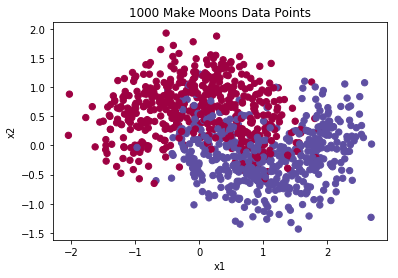

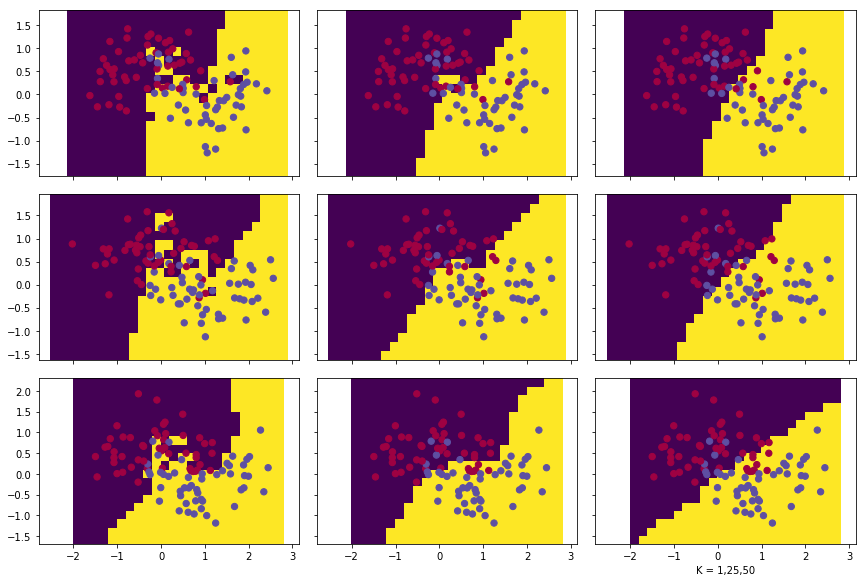

In [3]:
import numpy as np
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from mpl_toolkits.axes_grid1 import Grid

x,y = make_moons(n_samples=1000, noise=0.35)
plt.scatter(x[:,0], x[:,1], s=40, c=y, cmap=plt.cm.Spectral)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('1000 Make Moons Data Points')
plt.show()

rand1 = np.random.choice(y.shape[0], 100, replace=False)
rand2 = np.random.choice(y.shape[0], 100, replace=False)
rand3 = np.random.choice(y.shape[0], 100, replace=False)

arr = np.array([[rand1, 1], [rand1, 25], [rand1, 50], [rand2, 1], [rand2, 25], [rand2, 50], [rand3, 1], [rand3, 25], [rand3, 50]])

h=0.2
fig = plt.figure(2, figsize=(12, 8))
grid = Grid(fig, rect=111, nrows_ncols=(3,3), axes_pad=0.25, label_mode='L')
for i, ax in enumerate(grid):
    rand = arr[i][0]
    k = arr[i][1]
    
    x1 = x[rand, :]
    y1 = y[rand]
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x1, y1)
    x_min, x_max = x1[:,0].min() - .5, x1[:,0].max() + .5
    y_min, y_max = x1[:,1].min() - .5, x1[:,1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.pcolormesh(xx, yy, Z)

    # Plot also the training points
    ax.scatter(x1[:,0], x1[:,1], s=40, c=y1, cmap=plt.cm.Spectral)  
plt.tight_layout()
plt.ylabel('Sample 1,2,3')
plt.xlabel('K = 1,25,50')
plt.show()




**ANSWER**

**(e)** The lower the k value is, the more closely the decision boundary fits the data. While the k=1 decision boundary appears to be most accurate, this is because it exactly fits the training data, and is unlikely to perform as well on any testing data. For the higher k values, the decision boundaries are very similar across all three data sets, more generally describing the trend in the original data set.


**(f)** Using a lower k value is likely to overfit the decision boundary to the training data and will produce a lot of variance when tested on different samples and testing daa. A higher k value is likely to lead to a more linear decision boundary, most likely a case of underfit, and will not be as accurate as a model with a lower k value. 

## 6
**[20 points] Bias-variance trade-off II: Quantifying the tradeoff**. This exercise will explore the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

Here, the value of $k$ determines how flexible our model is.

**(a)** Using the function created earlier to generate random samples (using the `make_moons` function), create a new set of 1000 random samples, and call this dataset your test set and the previously created dataset your training set.

**(b)** Train a kNN classifier on your training set for $k = 1,2,...,500$. Apply each of these trained classifiers to both your training dataset and your test dataset and plot the classification error (fraction of mislabeled datapoints).

**(c)** What trend do you see in the results?

**(d)** What values of $k$ represent high bias and which represent high variance?

**(e)** What is the optimal value of $k$ and why?

**(f)** In kNN classifiers, the value of k controls the flexibility of the model - what controls the flexibility of other models?

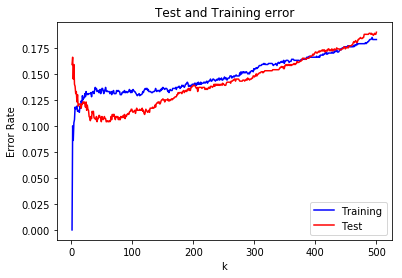

In [4]:
import numpy as np
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

x_test,y_test = make_moons(n_samples=1000, noise=0.35)
nvalues = 1000
error_test = np.ones(500)
error_train = np.ones(500)
for i in range(500):
    k= i+1
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x, y)
    y_hat_train = knn.predict(x)
    error_train[i] = 1 - (sum(y == y_hat_train) / nvalues)
    y_hat_test = knn.predict(x_test)
    error_test[i] = 1 - (sum(y_test == y_hat_test) / nvalues)
    
k_space = np.linspace(1, 500, num=500)
plt.plot(k_space, error_train, c='b')
plt.plot(k_space, error_test, c='r')
plt.xlabel('k')
plt.ylabel('Error Rate')
plt.title('Test and Training error')
plt.legend(['Training','Test'])
plt.show()
    

**ANSWER**

**(c)** Since the model is trained on the training data set, the model is perfectly accurate when k=1 and the only point considered for classification is itself. As k increases, the error rate increases. Since the testing data set differs from the training one, when k=1 the error rate is high since the model is overfit to the testing data. Until k=80, the testing error rate decreases as the overfit decreases. As k increases toward 500, the error rate steady increases as the decision boundary becomes more underfit and linear.

**(d)** Low values of k represent high variance as the model is overfit to the training data set and will likely perform poorly on differing testing data sets. High values of k represent high bias as the model is underfit and the decision boundary is more linear than the true relationship between the predictors and response.

**(e)** For this specific example, it appears that the optimal k value is somewhere around 70 as that is where testing error is lowest, while the training error is also relatively low. A k value of 70 is likely to produce a model general enough to perform well on many test data sets without yet overgeneralising the predictor response relationship.

**(f)** In other models, flexibility is controlled by the linearity of the predictors in the response function $\hat{f}(x)$. A less linear relationship between the predictors and response produces a more flexible model - likely with higher variance and lower bias. A more linear relationship between the predictors and response produces a les flexible model - likely with lower variance and higher bias.

## 7
**[20 points] Linear regression and nonlinear transformations**. You're given a dataset below that is partitioned into a training and testing dataset. Your goal is to develop a regression algorithm from the training data that performs well on the test data.

*Hint: Use the scikit learn [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) module.*

**(a)** Create a scatter plot of your training data.

**(b)** Estimate a linear regression model ($y = a_0 + a_1 x$) for the training data and calculate both the $R^2$ value and mean square error for the fit of that model for the training data. Also provide the equation representing the estimated model (e.g. $y = a_0 + a_1 x$, but with the estimated coefficients inserted.

**(c)** A linear model does not mean that non-linear relationships cannot be explored. From looking at the scatter plot of the training data, choose a transformation of the predictor variable, $x$ that may make sense for these data. This will be a multiple regression model of the form $y = a_0 + a_1 x_1 + a_2 x_2 + \ldots + a_n x_n$. Here $x_i$ could be any transformations of x - perhaps it's $\frac{1}{x}$, $log(x)$, $sin(x)$, $x^k$ (where $k$ is any power of your choosing). Provide the estimated equation for this multiple regression model (e.g. if you chose your predictors to be $x_1 = x$ and $x_2 = log(x)$, your model would be of the form $y = a_0 + a_1 x + a_2 log(x)$. Also provide the $R^2$ and mean square error of the fit for the training data.

**(d)** Using both of the models you created here in (b) and (c), plot the original data (as a scatter plot) and the two curves representing your models (each as a separate line).

**(e)** Using the models above, apply them to the test data and estimate the $R^2$ and mean square error of the test dataset.

**(f)** Which models perform better on the training data, and which on the test data? Why?

**(g)** Imagine that the test data were significantly different from the training dataset. How might this affect the predictive capability of your model? Why?

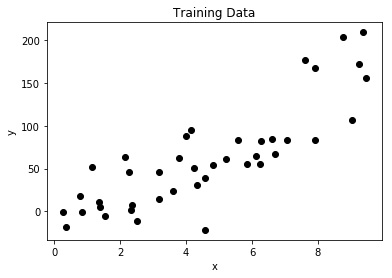

Simple Linear model: y = -21.730783 + 18.303207 X
Simple Linear Training Mean Squared Error: 1052.59
Simple Linear Training R-squared: 0.70 

Multiple Linear model: y = -16.253352 + 36.373781 X
Multiple Linear Training Mean Squared Error: 856.48
Multiple Linear Training R-squared: 0.75 



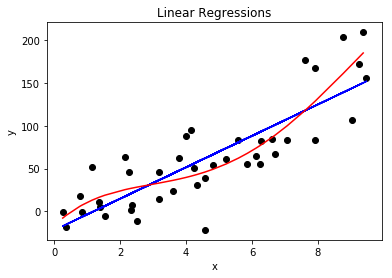

Simple Linear Test Mean Squared Error: 2023.31
Simple Linear Test R-squared: 0.56 

Multiple Linear Test Mean Squared Error: 1460.70
Multiple Linear Test R-squared: 0.68 



In [192]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

x_train = [3.19,9.26,9.38,8.77,7.91,3.79,3.18,7.61,2.36,6.26,6.62,1.53,6.25,7.93,7.07,4.58,4.14,2.14,9.04,4.56,3.99,6.71,2.51,0.84,6.13,5.22,0.25,3.60,1.36,5.59,4.81,1.14,0.36,2.31,1.37,5.86,4.23,9.48,2.26,0.77,4.33]
y_train = [46.40,172.16,209.00,203.31,82.88,62.57,14.38,177.00,8.01,82.35,84.84,-5.59,54.96,167.17,83.09,-21.63,94.64,63.97,106.57,38.99,88.26,66.99,-11.12,-0.44,65.08,61.47,-0.61,23.85,10.55,83.69,54.35,51.82,-18.63,1.98,4.90,55.44,50.09,155.66,45.57,18.12,30.58]

x_test = [5.65,0.07,8.84,5.14,6.65,1.35,5.45,7.39,3.35]
y_test = [98.52,16.09,198.45,75.90,85.11,47.64,14.76,141.03,-39.13]


plt.scatter(x_train, y_train, c='k')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Training Data')
plt.show()

regr = linear_model.LinearRegression()
regr.fit(np.reshape(x_train, [-1, 1]), np.reshape(y_train, [-1, 1]))
y_hat_simple = regr.predict(np.reshape(x_train, [-1, 1]))

print("Simple Linear model: y = {:3f} + {:3f} X".format(regr.intercept_[0], regr.coef_[0][0]))
print("Simple Linear Training Mean Squared Error: %.2f"
      % mean_squared_error(np.reshape(y_train, [-1, 1]), y_hat_simple))
print('Simple Linear Training R-squared: %.2f \n' % r2_score(np.reshape(y_train, [-1, 1]), y_hat_simple))

arr1inds = np.asarray(x_train).argsort()
reshape_x = np.reshape(x_train, [-1, 1])[arr1inds[:-1]]
reshape_y = np.reshape(y_train, [-1, 1])[arr1inds[:-1]]
x_nonlin = np.concatenate((reshape_x, np.power(reshape_x, 2), np.power(reshape_x, 3), np.power(reshape_x, 4)), axis=1)

regr.fit(x_nonlin, reshape_y)
y_hat_multiple = regr.predict(x_nonlin)

print("Multiple Linear model: y = {:3f} + {:3f} X".format(regr.intercept_[0], regr.coef_[0][0]))
print("Multiple Linear Training Mean Squared Error: %.2f"
      % mean_squared_error(reshape_y, y_hat_multiple))
print('Multiple Linear Training R-squared: %.2f \n' % r2_score(reshape_y, y_hat_multiple))

plt.scatter(x_train, y_train, c='k')
plt.plot(x_train, y_hat_simple, c='b')
plt.plot(reshape_x, y_hat_multiple, c='r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regressions')
plt.show()

regr.fit(np.reshape(x_train, [-1, 1]), np.reshape(y_train, [-1, 1]))
y_hat_simple_test = regr.predict(np.reshape(x_test, [-1, 1]))
print("Simple Linear Test Mean Squared Error: %.2f"
      % mean_squared_error(np.reshape(y_test, [-1, 1]), y_hat_simple_test))
print('Simple Linear Test R-squared: %.2f \n' % r2_score(np.reshape(y_test, [-1, 1]), y_hat_simple_test))

regr.fit(x_nonlin, reshape_y)
reshape_x_test = np.reshape(x_test, [-1, 1])
x_nonlin_test = np.concatenate((reshape_x_test, np.power(reshape_x_test, 2), np.power(reshape_x_test, 3), np.power(reshape_x_test, 4)), axis=1)
y_hat_multiple_test = regr.predict(x_nonlin_test)

print("Multiple Linear Test Mean Squared Error: %.2f"
      % mean_squared_error(np.reshape(y_test, [-1, 1]), y_hat_multiple_test))
print('Multiple Linear Test R-squared: %.2f \n' % r2_score(np.reshape(y_test, [-1, 1]), y_hat_multiple_test))

**ANSWER**

**(c)** The training data seemed like it could have a polynomial relationship to the response, so I tried to model a linear relationship of the polynomial predictors. I stopped at $x^4$ because I did not want to completely overfit the model to the training dataset. 

**(f)** The non-linear, polynomial model performed better on both the training and test data. A more flexible model will perform better on the training data set it is tailored it fit. For this test data set, my nonlinear model was a more accurate response predictor than the linear model. On a different data set, it may turn out that my more flexible, nonlinear model overfit the training data and performs significantly worse that my more general, linear model.

**(g)** If the test data significantly differed from the training data set, all models would perform poorly on the test data since they are trained on relationships gleamed from the training data. A less flexible general model would likely perform best on a significantly different test data set as it would be the model least tailored to the training data only conveys the most general trends in the data.